In [251]:
#importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [252]:
#Reading the csv file
df = pd.read_csv(r"H:\UpGrad\Machine Learning 1\Assignment-Linear Regression\CarPrice_Assignment.csv")
# Displaying the few top rows of the file
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [253]:
#Displaying the shape of the file
df.shape

(205, 26)

In [254]:
#displaying the info of the file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [255]:
# Describing the file
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [256]:
# Checking for the null in any column
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

- There are no missing values in the data

In [257]:
#Separating the Car Company Name and Car model from the carname column
new = df["CarName"].str.split(" ",n=1,expand=True)
df["CarCompany"] = new[0]
df["CarModel"] = new[1]
#Dropping the CarName and car_ID column
df.drop(columns=['CarName'],inplace=True)
df.drop(columns=['car_ID'],inplace=True)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,CarModel
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [258]:
# Since CarModel is not an independent variable we will drop it
df.drop(columns=['CarModel'],inplace = True)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [259]:
df['CarCompany'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
chevrolet       3
alfa-romero     3
jaguar          3
vw              2
maxda           2
renault         2
mercury         1
toyouta         1
porcshce        1
vokswagen       1
Nissan          1
Name: CarCompany, dtype: int64

- Here we could see that few spelling errors for the company name- (Nissa,nissan),(maxda,mazda),(porcshce,porsche),(totouta,toyota),(vokswagen,volkswagen),(vw,volkswagen)

In [260]:
# Correcting the name which has wrong spelling.
df['CarCompany']=df['CarCompany'].str.replace("Nissan","nissan")
df['CarCompany']=df['CarCompany'].str.replace("maxda","mazda")
df['CarCompany']=df['CarCompany'].str.replace('porcshce','porsche')
df['CarCompany']=df['CarCompany'].str.replace('toyouta','toyota')
df['CarCompany']=df['CarCompany'].str.replace('vokswagen','volkswagen')
df['CarCompany']=df['CarCompany'].str.replace('vw','volkswagen')

In [261]:
#Creating a new variable called risk from symboling
def risk_measure(row):
    if ((row['symboling'] == 3) | (row['symboling'] == 2)):
        return "High Risk"
    else:
        if ((row['symboling'] == 1) | (row['symboling'] == 0)):
            return "Medium Risk"
        else:
            if ((row['symboling'] == -1) | (row['symboling'] == -2)):
                return "Low Risk"
df['risk'] = df.apply(lambda row: risk_measure(row),axis=1)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,risk
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,High Risk
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,High Risk
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Medium Risk
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,High Risk
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,High Risk


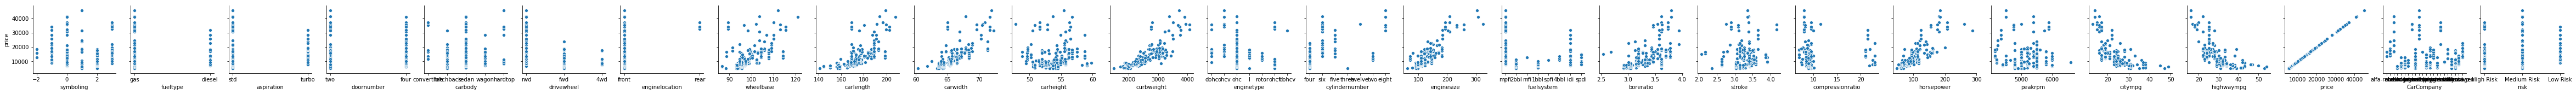

In [262]:
# Visualising the variables
#Plotting the target variable with independent variable
sns.pairplot(data=df, y_vars=['price'],x_vars=df.columns)
plt.show()

- Here we can see some of the variable shows some kind of linear relaitonships with the price (e.g., carwidth, curbweight, enginesize etc)
- We should consider linear regression because some of the variable shows linear relationship with price.
- We can see that most cars have fueltype as gas.
- We could see that most cars have std aspiratoin.
- It is quite clear that most car has rwd drive wheel.
- Most cars have front enginelocation.
- Most cars are Medium Risk ones.

C:\Users\SAIFULLAH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


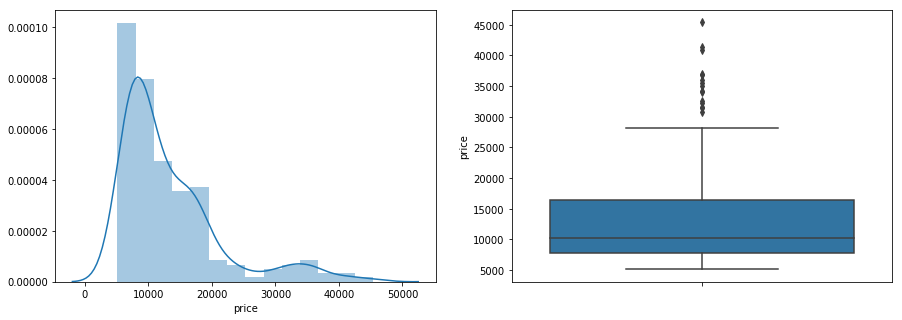

In [263]:
# Visualising the target(price) variable.
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.distplot(df['price'])
plt.subplot(1,2,2)
sns.boxplot(y = df['price'])

- Here we could easily see that most of the car have prices around 10000.
- 75% of prices are below 17000.

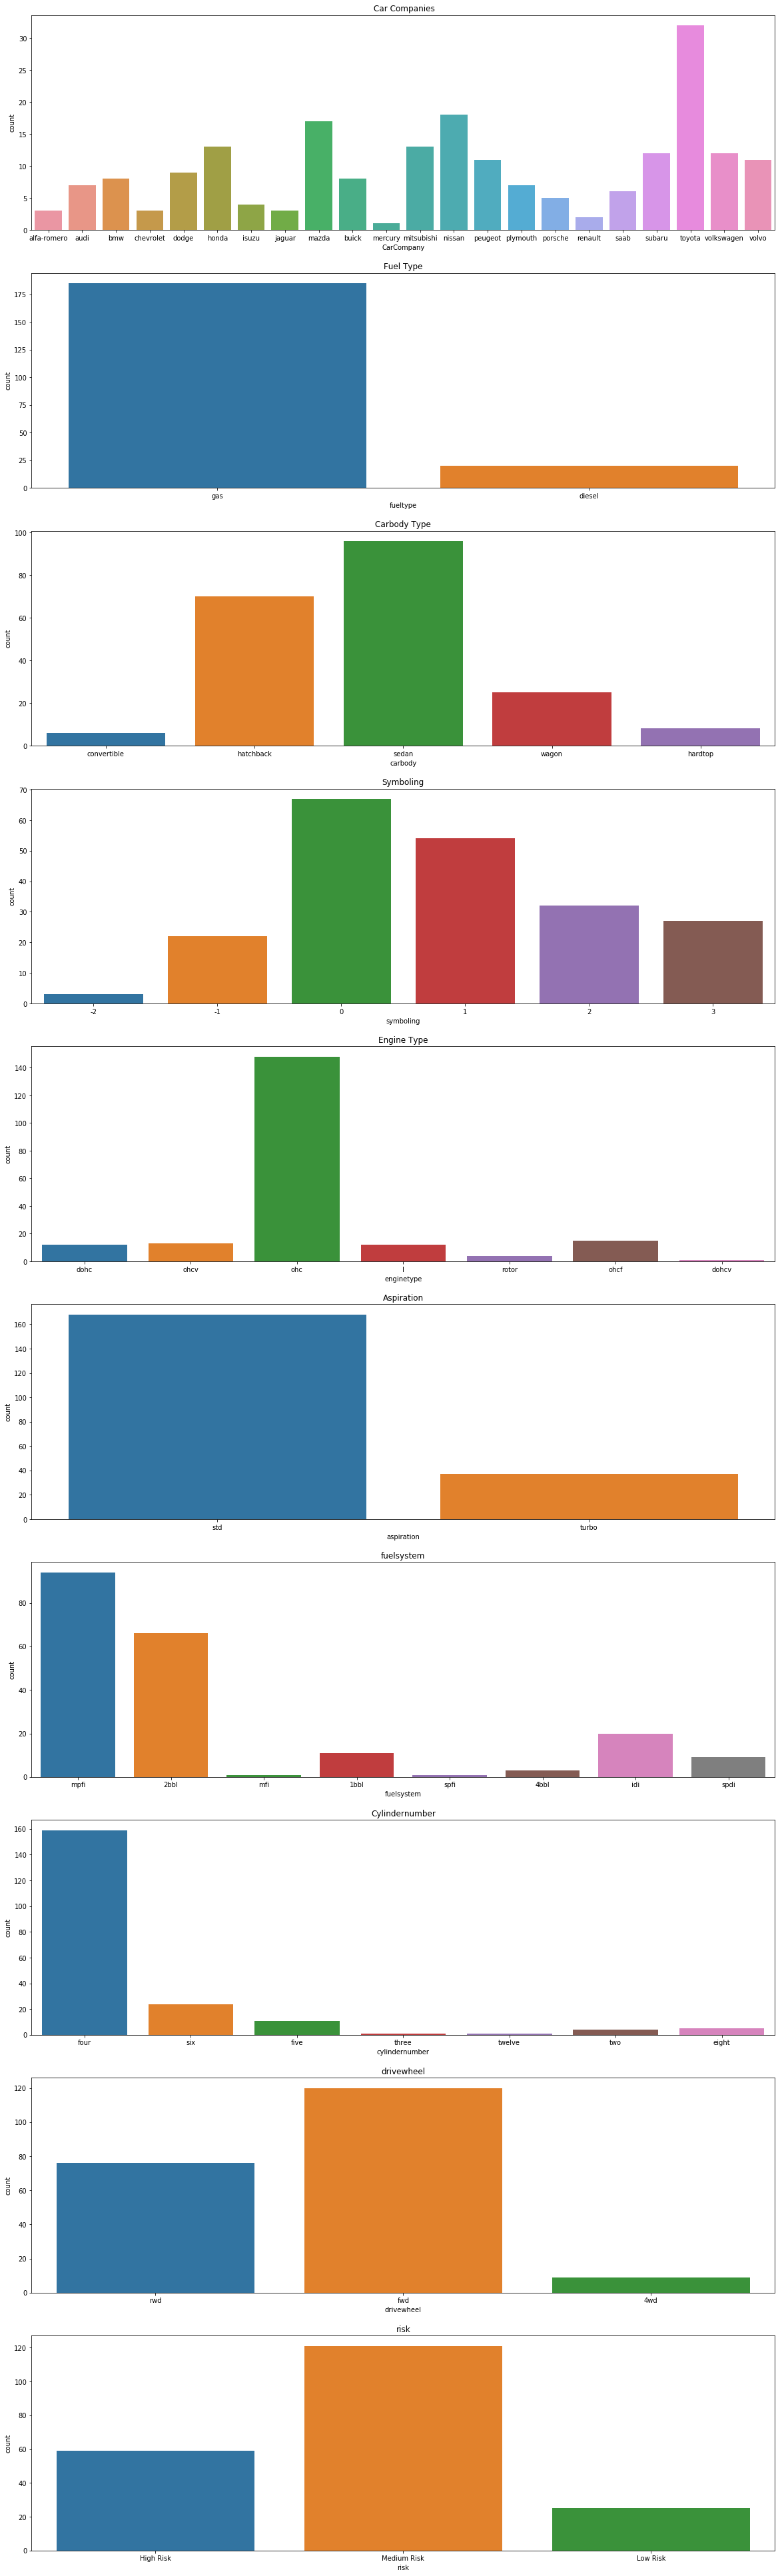

In [264]:
# Visualising the categorical variable
plt.figure(figsize=(20, 70))
plt.subplot(10,1,1)
sns.countplot(df['CarCompany'])
plt.title(' Car Companies')
plt.subplot(10,1,2)
sns.countplot(df['fueltype'])
plt.title('Fuel Type')
plt.subplot(10,1,3)
sns.countplot(df['carbody'])
plt.title('Carbody Type')
plt.subplot(10,1,4)
plt.title('Symboling')
sns.countplot(df['symboling'])
plt.subplot(10,1,5)
plt.title('Engine Type')
sns.countplot(df['enginetype'])
plt.subplot(10,1,6)
plt.title('Aspiration')
sns.countplot(df['aspiration'])
plt.subplot(10,1,7)
plt.title('fuelsystem')
sns.countplot(df['fuelsystem'])
plt.subplot(10,1,8)
plt.title('Cylindernumber')
sns.countplot(df['cylindernumber'])
plt.subplot(10,1,9)
plt.title('drivewheel')
sns.countplot(df['drivewheel'])
plt.subplot(10,1,10)
plt.title('risk')
sns.countplot(df['risk'])
plt.show()

- In the above Car Company plot we could see that most number of cars are of toyota company and the least one are of mercury company.
- In the Fueltype graph we could see that most number of cars are gas type fuel.
- In the carbody graph we could see that most number of sedan cars are there and convertible ones are the least.
- In the symboling graph we could see that most cars have 0 symboling bu there are lots of cars havong large symboling.
- In the enginetype graph we could see that ohc engine types are the most and dohcv are the least.
- In the aspiration graph we could see that there are more number of cars with std aspiration than turbo.
- In the fuelsystem graph we could see that most cars have mpfi fuel system.
- In the cylindernumber graph we could see that most cars have four cylinder.
- In the drivewheel graph we could see that most cars have fwd drive wheels followed by rwd drive wheel there are very small percentage of cars have 4wd drive wheel.
- In the risk graph we could see that most cars have medium risk but there are also substantial amount of cars in High risk.

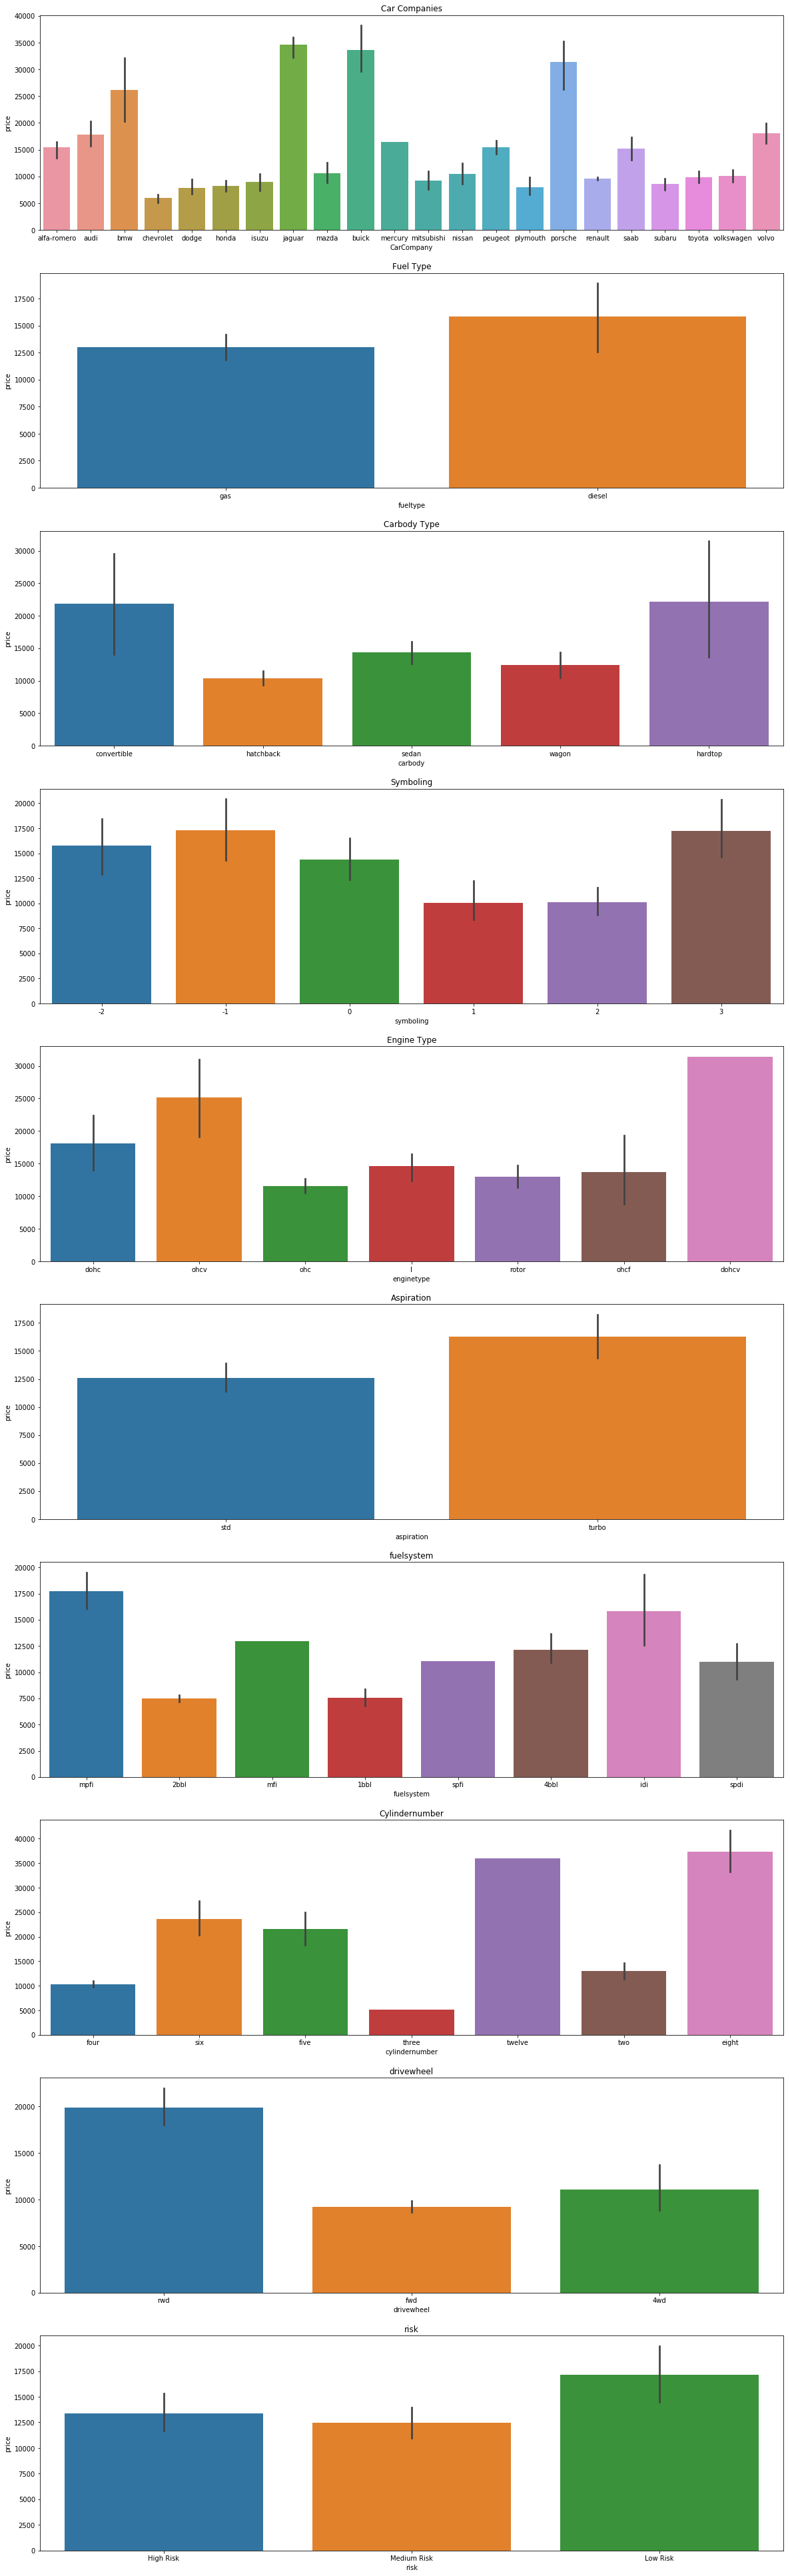

In [265]:
# Visualise Categorical variable with respect to the target variable
plt.figure(figsize=(20, 70))
plt.subplot(10,1,1)
sns.barplot(x = df['CarCompany'], y= df['price'])
plt.title('Car Companies')
plt.subplot(10,1,2)
sns.barplot(x = df['fueltype'], y = df['price'])
plt.title('Fuel Type')
plt.subplot(10,1,3)
sns.barplot(x = df['carbody'], y= df['price'])
plt.title('Carbody Type')
plt.subplot(10,1,4)
plt.title('Symboling')
sns.barplot(x = df['symboling'], y= df['price'])
plt.subplot(10,1,5)
plt.title('Engine Type')
sns.barplot(x = df['enginetype'], y= df['price'])
plt.subplot(10,1,6)
plt.title('Aspiration')
sns.barplot(x = df['aspiration'], y= df['price'])
plt.subplot(10,1,7)
plt.title('fuelsystem')
sns.barplot(x = df['fuelsystem'], y= df['price'])
plt.subplot(10,1,8)
plt.title('Cylindernumber')
sns.barplot(x = df['cylindernumber'], y= df['price'])
plt.subplot(10,1,9)
plt.title('drivewheel')
sns.barplot(x = df['drivewheel'], y= df['price'])
plt.subplot(10,1,10)
plt.title('risk')
sns.barplot(x = df['risk'], y= df['price'])
plt.show()

- In the above Car Company plot we could see that most costly cars are of jaguar company followed by buick followed by porsche and followed by bmw and the cheapest cars are of chevrolet.
- In the Fueltype graph we could see that diesel cars are more costly.
- In the carbody graph we could see that convertible and hardtop are of higest price range and hatchback is of lowest of them all.
- In the symboling graph we could see that symboling of -1 and 3 are of heighest price range followed by symbling of -2.
- In the enginetype graph we could see that dohcv engine type is of higest cost range followed by ohcv engine type and ohc is the least cost range.
- In the aspiration graph we could see that turbo aspiration are more costly than std aspiration.
- In the fuelsystem graph we could see that mpfi fuel system is heighest price range followed by idi fuel system. 
- In the cylindernumber graph we could see that eight cylinders cars are of heighest price range closely followed by twelve cylinder cars.
- In the drivewheel graph we could see that  cars having rwd drive wheel are most costly.
- In the risk graph we could see that low risk cars are most cosly.

In [266]:
# Encoding the categorical variables

In [267]:
# Converting binary variable to 1/0
df['fueltype'] = df['fueltype'].map({'gas':1,'diesel':0})
df['aspiration'] = df['aspiration'].map({'std':1,'turbo':0})
df['doornumber'] = df['doornumber'].map({'two':1,'four':0})
df['enginelocation'] = df['enginelocation'].map({'front':1,'rear':0})
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,risk
0,3,1,1,1,convertible,rwd,1,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,High Risk
1,3,1,1,1,convertible,rwd,1,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,High Risk
2,1,1,1,1,hatchback,rwd,1,94.5,171.2,65.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Medium Risk
3,2,1,1,0,sedan,fwd,1,99.8,176.6,66.2,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,High Risk
4,2,1,1,0,sedan,4wd,1,99.4,176.6,66.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,High Risk


In [268]:
# Creating dummy variables for the rest of the categorical variables(carbody,enginetype,cylindernumber,fuelsystem,CarCompany,risk,drivewheel)

In [269]:
#creating dummy variable for drivewheel
#Dropping a redundant dummy variable
status = pd.get_dummies(df['drivewheel'],drop_first=True)
#concatinate the dummy dataframe with the original one
df = pd.concat([df,status],axis = 1)
# Dropping the drivewheel variable
df.drop('drivewheel',axis = 1, inplace=True)

In [270]:
# creating dummy variable for carbody
#Dropping a redundant dummy variable
status = pd.get_dummies(df['carbody'],drop_first=True)
#concatinate the dummy dataframe with the original one
df = pd.concat([df,status],axis = 1)
# Dropping the carbody variable
df.drop('carbody',axis = 1, inplace=True)

In [271]:
# creating dummy variable for enginetype
#Dropping a redundant dummy variable
status = pd.get_dummies(df['enginetype'],drop_first=True)
#concatinate the dummy dataframe with the original one
df = pd.concat([df,status],axis = 1)
# Dropping the enginetype variable
df.drop('enginetype',axis = 1,inplace = True)

In [272]:
# Making the cylinder number column into a numerical column
df['cylindernumber'] = df['cylindernumber'].map({'four':4,'six':6,'five':5,'three':3,'eight':8,'two':2,'twelve':12})

In [273]:
# creating dummy variable for fuelsystem
#Dropping a redundant dummy variable
status = pd.get_dummies(df['fuelsystem'],drop_first=True)
#concatinate the dummy dataframe with the original one
df = pd.concat([df,status],axis = 1)
# Dropping the fuelsystem variable
df.drop('fuelsystem',axis = 1,inplace = True)

In [274]:
# creating dummy variable for CarCompany
#Dropping a redundant dummy variable
status = pd.get_dummies(df['CarCompany'],drop_first=True)
#concatinate the dummy dataframe with the original one
df = pd.concat([df,status],axis = 1)
# Dropping the CarCompany variable
df.drop('CarCompany',axis = 1,inplace = True)

In [275]:
# creating dummy variable for risk
#Dropping a redundant dummy variable
status = pd.get_dummies(df['risk'],drop_first=True)
#concatinate the dummy dataframe with the original one
df = pd.concat([df,status],axis = 1)
# Dropping the risk variable
df.drop('risk',axis = 1,inplace = True)

- Now All the variables are in numerical form.

In [276]:
# splitting the data set into training and test data set
df_train,df_test = train_test_split(df,train_size=0.75,random_state=100)

C:\Users\SAIFULLAH\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [277]:
df_train.shape

(153, 62)

- Training data set has 153 data points

In [278]:
df_test.shape

(52, 62)

- Test data set has 52 data points

In [279]:
# Scalling the data set by using MinMax Scaling method
#initiate an object
scaler = MinMaxScaler()
#create a list of numerical variables
num_vars = ['symboling','wheelbase','carlength','carwidth','carheight','curbweight','cylindernumber','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
#fit on dta
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.head()

C:\Users\SAIFULLAH\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\SAIFULLAH\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\SAIFULLAH\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,Low Risk,Medium Risk
164,0.6,1,1,1,1,0.272414,0.448780,0.308333,0.400000,0.277735,...,0,0,0,0,0,1,0,0,0,1
188,0.8,1,1,0,1,0.368966,0.497561,0.433333,0.658333,0.314973,...,0,0,0,0,0,0,1,0,0,0
7,0.6,1,1,0,1,0.662069,0.839024,0.925000,0.658333,0.568658,...,0,0,0,0,0,0,0,0,0,1
158,0.4,0,1,0,1,0.313793,0.409756,0.341667,0.433333,0.305275,...,0,0,0,0,0,1,0,0,0,1
123,0.2,1,1,0,1,0.575862,0.544715,0.358333,1.000000,0.406129,...,1,0,0,0,0,0,0,0,1,0


In [280]:
# Training the model

In [281]:
# Separating the independent and dependent variable
y_train = df_train.pop('price')
x_train = df_train

In [282]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(x_train,y_train)
rfe = RFE(lm,15)
rfe = rfe.fit(x_train,y_train)
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 40),
 ('fueltype', True, 1),
 ('aspiration', False, 14),
 ('doornumber', False, 41),
 ('enginelocation', True, 1),
 ('wheelbase', False, 6),
 ('carlength', False, 18),
 ('carwidth', True, 1),
 ('carheight', False, 17),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', False, 13),
 ('peakrpm', True, 1),
 ('citympg', False, 3),
 ('highwaympg', False, 26),
 ('fwd', False, 38),
 ('rwd', False, 46),
 ('hardtop', False, 8),
 ('hatchback', False, 5),
 ('sedan', False, 7),
 ('wagon', False, 4),
 ('dohcv', False, 12),
 ('l', True, 1),
 ('ohc', False, 22),
 ('ohcf', False, 10),
 ('ohcv', False, 37),
 ('rotor', False, 2),
 ('2bbl', False, 34),
 ('4bbl', False, 15),
 ('idi', True, 1),
 ('mfi', False, 21),
 ('mpfi', False, 44),
 ('spdi', False, 42),
 ('spfi', False, 39),
 ('audi', False, 29),
 ('bmw', True, 1),
 ('buick', False, 43),
 ('chevrolet', Fal

In [283]:
col = x_train.columns[rfe.support_]
col

Index(['fueltype', 'enginelocation', 'carwidth', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'peakrpm', 'l', 'idi', 'bmw', 'peugeot', 'porsche'],
      dtype='object')

In [284]:
# Building model using statsmodel for the detailed statistics
# Creating the x_train dataframe with RFE selected variables
x_train_rfe = x_train[col]
# adding a constant variable
x_train_rfe = sm.add_constant(x_train_rfe)
#Running the linear model
lm = sm.OLS(y_train,x_train_rfe).fit()
# Summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     143.3
Date:                Sat, 13 Jul 2019   Prob (F-statistic):           8.42e-75
Time:                        20:52:31   Log-Likelihood:                 226.91
No. Observations:                 153   AIC:                            -423.8
Df Residuals:                     138   BIC:                            -378.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2958      0.070      4.215      0.000       0.157       0.435
fueltype             0.0616      0.043      1.448      0.150      -0.023       0.146
enginelocation      -0.2638      0.066     -3.981      0.000      -0.395      -0.133
carwidth             0.3674      0.056      6.616      0.000       0.258       0.477
curbweight           0.3272      0.076      4.326      0.000       0.178       0.477
cylindernumber      -0.8298      0.175     -4.734      0.000      -1.176      -0.483
enginesize           1.2386      0.189      6.537      0.000       0.864       1.613
boreratio           -0.3173      0.061     -5.236      0.000      -0.437      -0.197
stroke              -0.3199      0.057     -5.574      0.000      -0.433      -0.206
compressionratio    -0.1243      0.136     -0.913      0.363      -0.394       0.145
peakrpm              0.1218      0.032      3.762      0.000       0.058       0.186
l                    0.1561      0.060      2.601      0.010       0.037       0.275
idi                  0.2342      0.088      2.647      0.009       0.059       0.409
bmw                  0.2509      0.025      9.888      0.000       0.201       0.301
peugeot             -0.2763      0.066     -4.173      0.000      -0.407      -0.145
porsche              0.1995      0.050      4.027      0.000       0.102       0.297
==============================================================================
Omnibus:                        6.932   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                7.923
Skew:                           0.326   Prob(JB):                       0.0190
Kurtosis:                       3.904   Cond. No.                     1.25e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.99e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- In this model R-squared = 0.936 and Adj R-squared = 0.929, since both are close this shows that there isn't much multicollinearity in the model.
- In this model variable compressionratio has very high p-value(0.363), so we have to remove it.

In [285]:
# Removing the variable
x_train_new = x_train_rfe.drop(['compressionratio'],axis = 1)
# Rebuilding the model
# adding a constant variable
x_train_new = sm.add_constant(x_train_new)
#Running the linear model
lm = sm.OLS(y_train,x_train_new).fit()
# Summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     154.5
Date:                Sat, 13 Jul 2019   Prob (F-statistic):           1.00e-75
Time:                        20:52:31   Log-Likelihood:                 226.45
No. Observations:                 153   AIC:                            -424.9
Df Residuals:                     139   BIC:                            -382.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2494      0.048      5.157      0.000       0.154       0.345
fueltype           0.0922      0.026      3.537      0.001       0.041       0.144
enginelocation    -0.2701      0.066     -4.099      0.000      -0.400      -0.140
carwidth           0.3657      0.055      6.594      0.000       0.256       0.475
curbweight         0.3421      0.074      4.635      0.000       0.196       0.488
cylindernumber    -0.8364      0.175     -4.778      0.000      -1.183      -0.490
enginesize         1.2259      0.189      6.492      0.000       0.853       1.599
boreratio         -0.3132      0.060     -5.185      0.000      -0.433      -0.194
stroke            -0.3070      0.056     -5.523      0.000      -0.417      -0.197
peakrpm            0.1174      0.032      3.669      0.000       0.054       0.181
l                  0.1548      0.060      2.582      0.011       0.036       0.273
idi                0.1572      0.026      5.940      0.000       0.105       0.209
bmw                0.2525      0.025      9.981      0.000       0.203       0.303
peugeot           -0.2705      0.066     -4.106      0.000      -0.401      -0.140
porsche            0.1931      0.049      3.941      0.000       0.096       0.290
==============================================================================
Omnibus:                        7.546   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                9.300
Skew:                           0.321   Prob(JB):                      0.00956
Kurtosis:                       4.022   Cond. No.                     1.23e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.11e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- In this model R-squared = 0.935 and Adj R-squared = 0.929, since both are close this shows that there isn't much multicollinearity in the model.
- In this model all the variales have a p-value in the asceptable range, i.e., less than 0.05

In [286]:
# Calculating the VIF of the new model
vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values,i) for i in range (x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

C:\Users\SAIFULLAH\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\SAIFULLAH\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
1,fueltype,inf
11,idi,inf
6,enginesize,37.480000
5,cylindernumber,17.860000
4,curbweight,10.500000
13,peugeot,9.850000
10,l,9.120000
7,boreratio,6.960000
3,carwidth,4.780000
8,stroke,3.480000


- In this modelthe VIF value of variable fueltype is very high therefore we will remove it.

In [287]:
# Removing the variable
x_train_new = x_train_new.drop(['fueltype'],axis = 1)
# Rebuilding the model
# adding a constant variable
x_train_new = sm.add_constant(x_train_new)
#Running the linear model
lm = sm.OLS(y_train,x_train_new).fit()
# Summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     154.5
Date:                Sat, 13 Jul 2019   Prob (F-statistic):           1.00e-75
Time:                        20:52:33   Log-Likelihood:                 226.45
No. Observations:                 153   AIC:                            -424.9
Df Residuals:                     139   BIC:                            -382.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3417      0.073      4.676      0.000       0.197       0.486
enginelocation    -0.2701      0.066     -4.099      0.000      -0.400      -0.140
carwidth           0.3657      0.055      6.594      0.000       0.256       0.475
curbweight         0.3421      0.074      4.635      0.000       0.196       0.488
cylindernumber    -0.8364      0.175     -4.778      0.000      -1.183      -0.490
enginesize         1.2259      0.189      6.492      0.000       0.853       1.599
boreratio         -0.3132      0.060     -5.185      0.000      -0.433      -0.194
stroke            -0.3070      0.056     -5.523      0.000      -0.417      -0.197
peakrpm            0.1174      0.032      3.669      0.000       0.054       0.181
l                  0.1548      0.060      2.582      0.011       0.036       0.273
idi                0.0649      0.021      3.163      0.002       0.024       0.106
bmw                0.2525      0.025      9.981      0.000       0.203       0.303
peugeot           -0.2705      0.066     -4.106      0.000      -0.401      -0.140
porsche            0.1931      0.049      3.941      0.000       0.096       0.290
==============================================================================
Omnibus:                        7.546   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                9.300
Skew:                           0.321   Prob(JB):                      0.00956
Kurtosis:                       4.022   Cond. No.                         102.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- This model R-squared = 0.935 and Adj R-squared = 0.929
- In this model all the variales have a p-value in the asceptable range, i.e., less than 0.05

In [288]:
# Calculating the VIF of the new model
vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values,i) for i in range (x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,const,244.62
5,enginesize,37.48
4,cylindernumber,17.86
3,curbweight,10.50
12,peugeot,9.85
9,l,9.12
6,boreratio,6.96
2,carwidth,4.78
7,stroke,3.48
13,porsche,2.80


- In this modelthe VIF value of variable enginesize is very high therefore we will remove it.

In [289]:
# Removing the variable
x_train_new = x_train_new.drop(['enginesize'],axis = 1)
# Rebuilding the model
# adding a constant variable
x_train_new = sm.add_constant(x_train_new)
#Running the linear model
lm = sm.OLS(y_train,x_train_new).fit()
# Summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     126.6
Date:                Sat, 13 Jul 2019   Prob (F-statistic):           7.63e-69
Time:                        20:52:33   Log-Likelihood:                 206.19
No. Observations:                 153   AIC:                            -386.4
Df Residuals:                     140   BIC:                            -347.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1821      0.078      2.327      0.021       0.027       0.337
enginelocation    -0.4260      0.070     -6.105      0.000      -0.564      -0.288
carwidth           0.2940      0.062      4.756      0.000       0.172       0.416
curbweight         0.6116      0.069      8.811      0.000       0.474       0.749
cylindernumber     0.2057      0.079      2.592      0.011       0.049       0.363
boreratio         -0.0191      0.045     -0.421      0.675      -0.109       0.071
stroke            -0.0313      0.041     -0.768      0.444      -0.112       0.049
peakrpm            0.0969      0.036      2.676      0.008       0.025       0.169
l                  0.2034      0.068      3.006      0.003       0.070       0.337
idi                0.0457      0.023      1.978      0.050     2.3e-05       0.091
bmw                0.2601      0.029      9.049      0.000       0.203       0.317
peugeot           -0.3367      0.074     -4.549      0.000      -0.483      -0.190
porsche            0.1126      0.054      2.089      0.039       0.006       0.219
==============================================================================
Omnibus:                       15.815   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.327
Skew:                           0.503   Prob(JB):                     1.16e-06
Kurtosis:                       4.810   Cond. No.                         37.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- This model R-squared = 0.916 and Adj R-squared = 0.908
- In this model variable boreratio have very high pvalue(0.675), so we have to remove it.

In [290]:
# Removing the variable
x_train_new = x_train_new.drop(['boreratio'],axis = 1)
# Rebuilding the model
# adding a constant variable
x_train_new = sm.add_constant(x_train_new)
#Running the linear model
lm = sm.OLS(y_train,x_train_new).fit()
# Summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     138.9
Date:                Sat, 13 Jul 2019   Prob (F-statistic):           6.89e-70
Time:                        20:52:34   Log-Likelihood:                 206.10
No. Observations:                 153   AIC:                            -388.2
Df Residuals:                     141   BIC:                            -351.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1705      0.073      2.335      0.021       0.026       0.315
enginelocation    -0.4261      0.070     -6.125      0.000      -0.564      -0.289
carwidth           0.2910      0.061      4.753      0.000       0.170       0.412
curbweight         0.5964      0.059     10.082      0.000       0.479       0.713
cylindernumber     0.2227      0.068      3.270      0.001       0.088       0.357
stroke            -0.0246      0.037     -0.657      0.512      -0.099       0.049
peakrpm            0.1021      0.034      3.003      0.003       0.035       0.169
l                  0.2052      0.067      3.046      0.003       0.072       0.338
idi                0.0476      0.023      2.109      0.037       0.003       0.092
bmw                0.2594      0.029      9.067      0.000       0.203       0.316
peugeot           -0.3373      0.074     -4.571      0.000      -0.483      -0.191
porsche            0.1041      0.050      2.090      0.038       0.006       0.202
==============================================================================
Omnibus:                       15.213   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.997
Skew:                           0.503   Prob(JB):                     3.73e-06
Kurtosis:                       4.706   Cond. No.                         35.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- This model R-squared = 0.916 and Adj R-squared = 0.909
- In this model variable stroke have very high pvalue(0.512), so we have to remove it.

In [291]:
# Removing the variable
x_train_new = x_train_new.drop(['stroke'],axis = 1)
# Rebuilding the model
# adding a constant variable
x_train_new = sm.add_constant(x_train_new)
#Running the linear model
lm = sm.OLS(y_train,x_train_new).fit()
# Summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     153.4
Date:                Sat, 13 Jul 2019   Prob (F-statistic):           6.71e-71
Time:                        20:52:34   Log-Likelihood:                 205.86
No. Observations:                 153   AIC:                            -389.7
Df Residuals:                     142   BIC:                            -356.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1617      0.072      2.258      0.025       0.020       0.303
enginelocation    -0.4275      0.069     -6.161      0.000      -0.565      -0.290
carwidth           0.2889      0.061      4.735      0.000       0.168       0.410
curbweight         0.5908      0.058     10.113      0.000       0.475       0.706
cylindernumber     0.2292      0.067      3.408      0.001       0.096       0.362
peakrpm            0.0987      0.034      2.943      0.004       0.032       0.165
l                  0.2056      0.067      3.059      0.003       0.073       0.338
idi                0.0439      0.022      2.012      0.046       0.001       0.087
bmw                0.2601      0.029      9.118      0.000       0.204       0.317
peugeot           -0.3340      0.073     -4.546      0.000      -0.479      -0.189
porsche            0.1075      0.049      2.175      0.031       0.010       0.205
==============================================================================
Omnibus:                       14.661   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               23.180
Skew:                           0.500   Prob(JB):                     9.26e-06
Kurtosis:                       4.624   Cond. No.                         33.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- This model R-squared = 0.915 and Adj R-squared = 0.909
- In this model all variable have p-value inasceptable range i.e., less than 0.05 

In [292]:
# Calculating the VIF of the new model
vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values,i) for i in range (x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,const,183.43
9,peugeot,9.57
6,l,8.94
3,curbweight,5.14
2,carwidth,4.52
1,enginelocation,2.22
10,porsche,2.22
4,cylindernumber,2.06
5,peakrpm,1.53
7,idi,1.51


- In this modelthe VIF value of variable peugeot is very high therefore we will remove it.

In [293]:
# Removing the variable
x_train_new = x_train_new.drop(['peugeot'],axis = 1)
# Rebuilding the model
# adding a constant variable
x_train_new = sm.add_constant(x_train_new)
#Running the linear model
lm = sm.OLS(y_train,x_train_new).fit()
# Summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     147.8
Date:                Sat, 13 Jul 2019   Prob (F-statistic):           7.87e-68
Time:                        20:52:35   Log-Likelihood:                 195.47
No. Observations:                 153   AIC:                            -370.9
Df Residuals:                     143   BIC:                            -340.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1562      0.076      2.046      0.043       0.005       0.307
enginelocation    -0.4085      0.074     -5.530      0.000      -0.555      -0.262
carwidth           0.2513      0.064      3.897      0.000       0.124       0.379
curbweight         0.5722      0.062      9.206      0.000       0.449       0.695
cylindernumber     0.2705      0.071      3.805      0.000       0.130       0.411
peakrpm            0.1009      0.036      2.822      0.005       0.030       0.172
l                 -0.0777      0.027     -2.891      0.004      -0.131      -0.025
idi                0.0399      0.023      1.717      0.088      -0.006       0.086
bmw                0.2615      0.030      8.594      0.000       0.201       0.322
porsche            0.1189      0.053      2.259      0.025       0.015       0.223
==============================================================================
Omnibus:                       30.330   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.718
Skew:                           0.894   Prob(JB):                     1.08e-13
Kurtosis:                       5.484   Cond. No.                         33.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- This model R-squared = 0.903 and Adj R-squared = 0.897
- In this model variable idi have very high pvalue(0.088), so we have to remove it.

In [294]:
# Removing the variable
x_train_new = x_train_new.drop(['idi'],axis = 1)
# Rebuilding the model
# adding a constant variable
x_train_new = sm.add_constant(x_train_new)
#Running the linear model
lm = sm.OLS(y_train,x_train_new).fit()
# Summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     163.7
Date:                Sat, 13 Jul 2019   Prob (F-statistic):           2.54e-68
Time:                        20:52:35   Log-Likelihood:                 193.90
No. Observations:                 153   AIC:                            -369.8
Df Residuals:                     144   BIC:                            -342.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1794      0.076      2.370      0.019       0.030       0.329
enginelocation    -0.4195      0.074     -5.660      0.000      -0.566      -0.273
carwidth           0.2686      0.064      4.189      0.000       0.142       0.395
curbweight         0.5730      0.063      9.157      0.000       0.449       0.697
cylindernumber     0.2480      0.070      3.526      0.001       0.109       0.387
peakrpm            0.0725      0.032      2.271      0.025       0.009       0.136
l                 -0.0723      0.027     -2.693      0.008      -0.125      -0.019
bmw                0.2565      0.030      8.412      0.000       0.196       0.317
porsche            0.1179      0.053      2.225      0.028       0.013       0.223
==============================================================================
Omnibus:                       27.055   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.604
Skew:                           0.820   Prob(JB):                     1.03e-11
Kurtosis:                       5.291   Cond. No.                         32.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- This model R-squared = 0.901 and Adj R-squared = 0.895
- In this model all variable have p-value inasceptable range i.e., less than 0.05

In [295]:
# Calculating the VIF of the new model
vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values,i) for i in range (x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,const,177.67
3,curbweight,5.11
2,carwidth,4.33
8,porsche,2.22
1,enginelocation,2.20
4,cylindernumber,1.95
6,l,1.24
5,peakrpm,1.20
7,bmw,1.09


- This is our final model where all the variables p-value are less than 0.05 and the VIF of all the variable are approximatley less than or equal to 5.

In [296]:
# Predicting on the training set
y_train_pred = lm.predict(x_train_new)

C:\Users\SAIFULLAH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


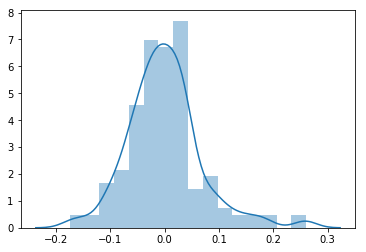

In [297]:
res = y_train - y_train_pred
sns.distplot(res)

 - The residual is a normal curve with the mean at 0.

In [298]:
#create a list of numerical variables
num_vars = ['symboling','wheelbase','carlength','carwidth','carheight','curbweight','cylindernumber','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
# tansform the data set
df_test[num_vars] = scaler.transform(df_test[num_vars])


C:\Users\SAIFULLAH\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\SAIFULLAH\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [299]:
# Separating the independent and dependent variable
y_test = df_test.pop('price')
x_test = df_test

In [300]:
x_train_new = x_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
x_test_new = x_test[x_train_new.columns]

# Adding a constant variable 
x_test_new = sm.add_constant(x_test_new)

In [301]:
#Prediction
y_test_pred = lm.predict(x_test_new)

In [302]:
#Evaluate
r2_score(y_test,y_test_pred)

0.840701035465288

- Here we could see that the R-squared of the test set is 0.84 which is very close to Adj R-squared of training set (0.895)

- So in our final model the variables are curbweight,carwidth,porsche,cylindernumber,l,peakrpm,bmw and enginelocation.
- i.e. price depends on the Weight of the car without the occupants, width of the car, Car company Porsche, Number of cylinder in the car, l engine type, Car's peak rpm, bmw car company and location of the engine.

- price = 0.2686*carwidth - 0.4195*enginelocation + 0.5730*curbweight + 0.2480*cylindernumber + 0.0725*peakrpm - 0.0723*l + 0.2565*bmw + 0.1179*porsche.
- Here we could see that price is positively related to carwidth, curbweight, cylindernumber, peakrpm, porsche and bmw company and negatively related to enginelocation and engine type l.